In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


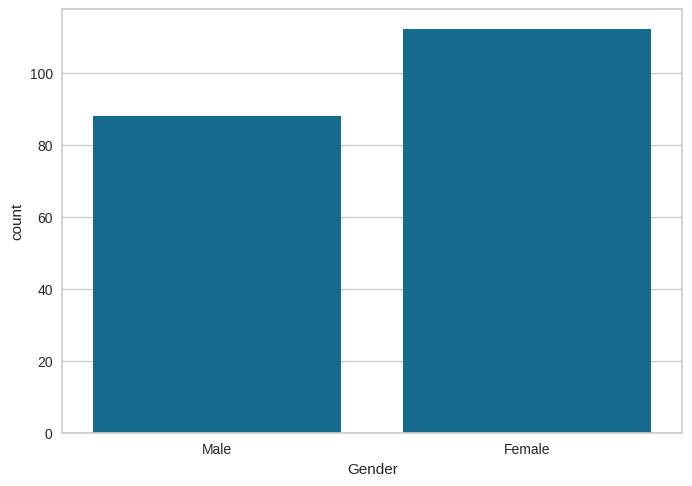

In [3]:
path = '/content/drive/MyDrive/MachineLearning/Mall_Customers.csv'
data = pd.read_csv(path)
data.head()
df = data.copy()
df.info()
df.describe()

# Checking Null Values
df.isna().sum()

df.Gender.value_counts()

# Plot to check the count of male and female customers
sns.countplot(data=df,x='Gender')
plt.show()

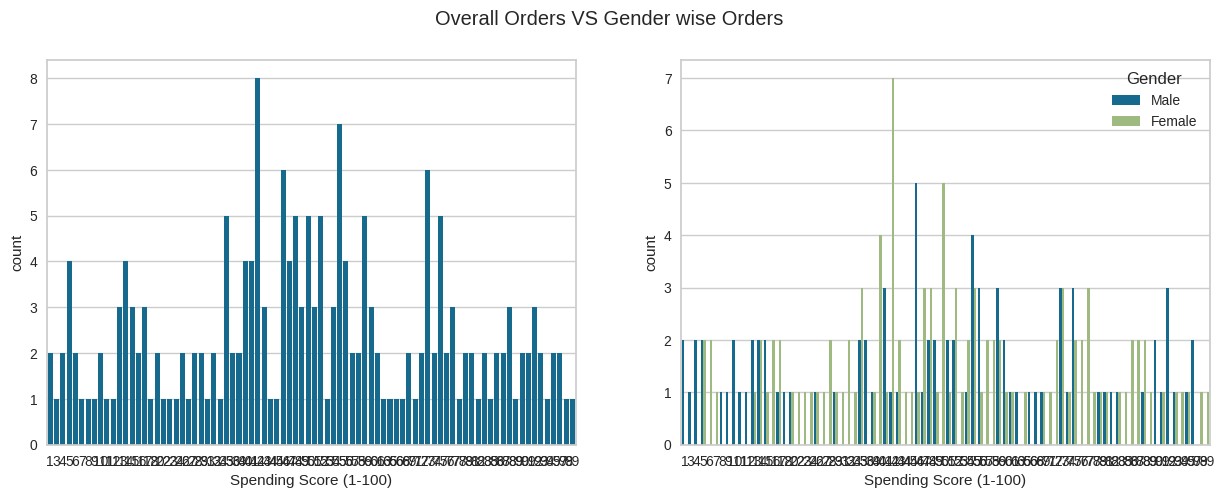

In [4]:
# Overall orders count
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Spending Score (1-100)')

# Orders count by each gender
plt.subplot(1,2,2)
sns.countplot(data=df,x='Spending Score (1-100)',hue='Gender')
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()

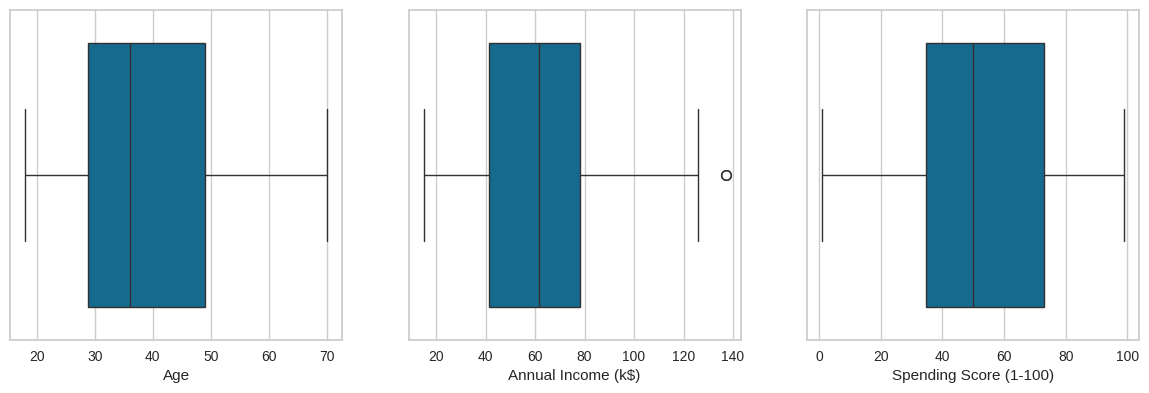

In [5]:
# Boxplot for orders and searches of each brands
cols = list(df.columns[2:])
def dist_list(lst):
    plt.figure(figsize=(30,30))
    for i,col in enumerate(lst,1):
        plt.subplot(6,6,i)
        sns.boxplot(data=df,x=df[col])
dist_list(cols)

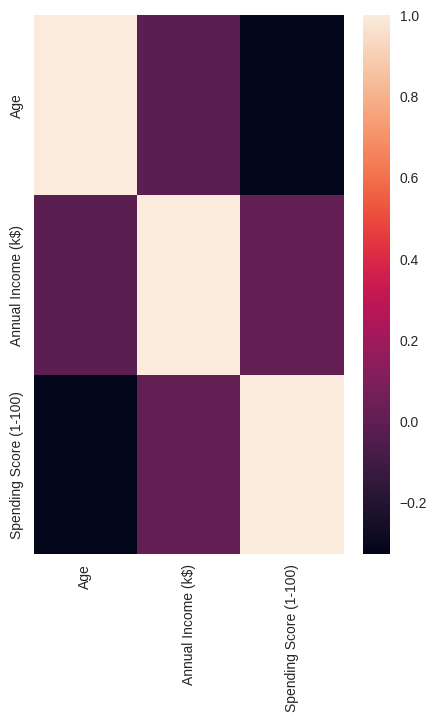

In [6]:
plt.figure(figsize=(5,7))
sns.heatmap(df.iloc[:,2: ].corr())
plt.show()

In [7]:
new_df = df.copy()
new_df['Total Search'] = new_df.iloc[:,3:].sum(axis=1)

In [8]:
new_df.sort_values('Total Search',ascending=False)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Total Search
199,200,Male,30,137,83,220
193,194,Female,38,113,91,204
197,198,Male,32,126,74,200
195,196,Female,35,120,79,199
185,186,Male,30,99,97,196
...,...,...,...,...,...,...
10,11,Male,67,19,14,33
22,23,Female,46,25,5,30
6,7,Female,35,18,6,24
8,9,Male,64,19,3,22


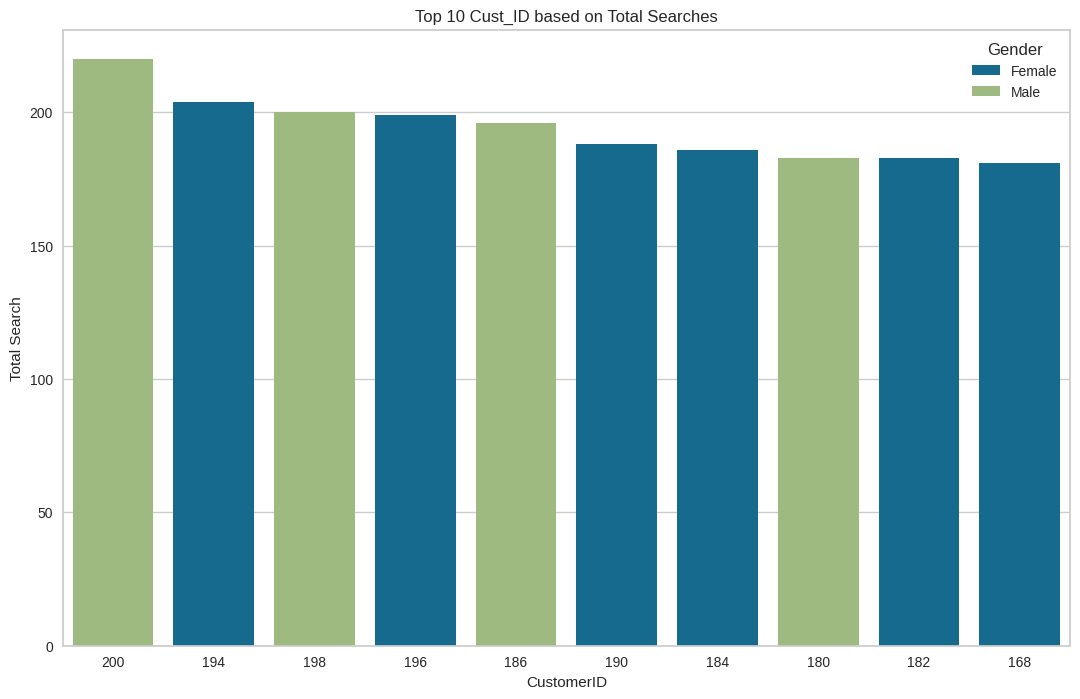

In [9]:
plt.figure(figsize=(13,8))
plt_data = new_df.sort_values('Total Search',ascending=False)[['CustomerID','Gender','Total Search']].head(10)
sns.barplot(data=plt_data,
            x='CustomerID',
            y='Total Search',
            hue='Gender',
            order=plt_data.sort_values('Total Search',ascending = False).CustomerID)
plt.title("Top 10 Cust_ID based on Total Searches")
plt.show()

In [10]:
x = df.iloc[:,2: ].values
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [11]:
scale = MinMaxScaler()
features = scale.fit_transform(x)
features

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

In [12]:
#@title Elbow Method to get optimal K value

In [13]:
inertia = []
for i in range(1,16):
    k_means = KMeans(n_clusters=i)
    k_means = k_means.fit(features)
    inertia.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

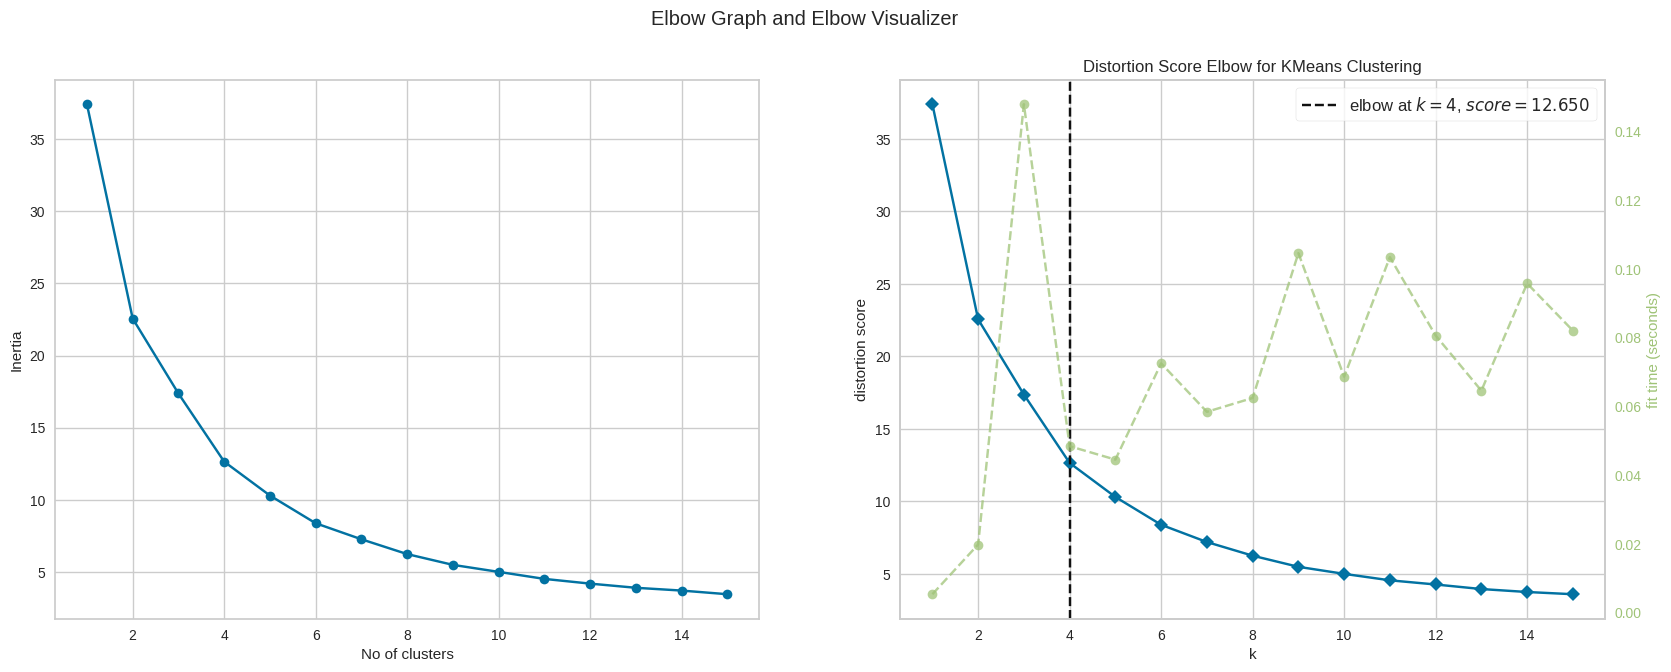

In [14]:
# elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16), inertia, 'bo-')
plt.xlabel('No of clusters'), plt.ylabel('Inertia')

# Kelbow visualizer
plt.subplot(1,2,2)
kmeans = KMeans()
visualize = KElbowVisualizer(kmeans,k=(1,16))
visualize.fit(features)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()

In [15]:
silhouette_avg = []
for i in range(2,16):
    # initialise kmeans
    kmeans = KMeans(n_clusters= i)
    cluster_labels = kmeans.fit_predict(features)
    # silhouette score
    silhouette_avg.append(silhouette_score(features,cluster_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

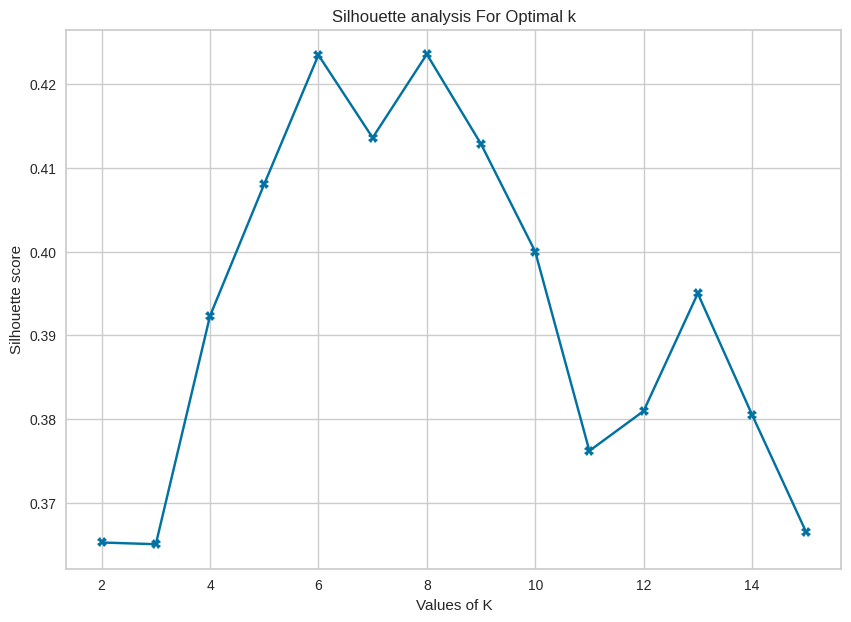

In [16]:
plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg,'bX-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [17]:
#Taking K value as 3 as per Elbow Method

model = KMeans(n_clusters=3)
model = model.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
y_km = model.predict(features)
centers = model.cluster_centers_

In [19]:
df['Cluster'] = pd.DataFrame(y_km)
df.to_csv("Cluster_data",index=False)

In [20]:
df['Cluster'].value_counts()

Cluster
0    94
2    67
1    39
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

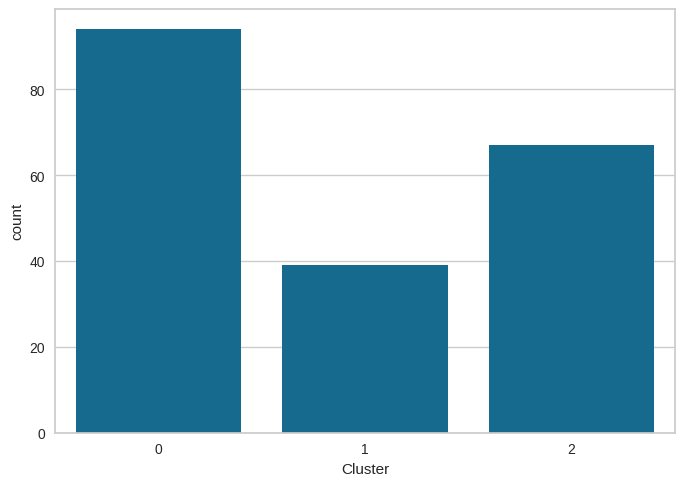

In [21]:
sns.countplot(data=df,x='Cluster')
plt.show

In [22]:
c_df = pd.read_csv('Cluster_data')
c_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [23]:
c_df['Total Search'] = c_df.iloc[:,3:38].sum(axis=1)

Analyzing Cluster 0

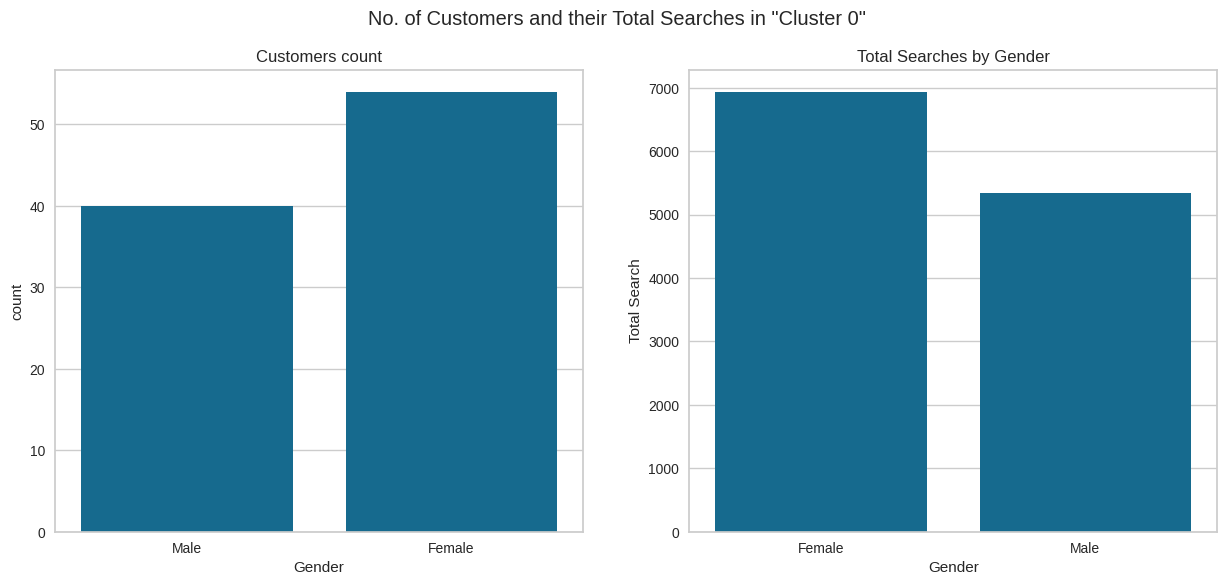

In [24]:
cl_0 = c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster == 0')
cl_0
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster == 0'),x='Gender')
plt.title('Customers count')

plt.subplot(1,2,2)
sns.barplot(data=cl_0,x='Gender',y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of Customers and their Total Searches in "Cluster 0"')
plt.show()

In [25]:
#@title Analyzing Cluster 1

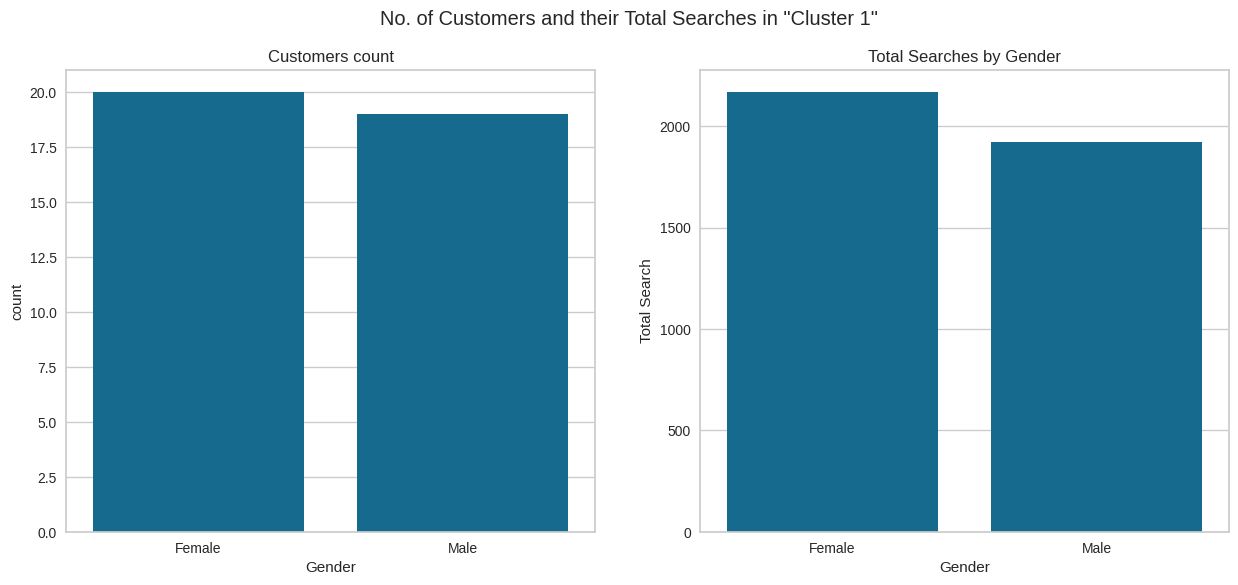

In [26]:
cl_1 = c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster == 1')
cl_1
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster == 1'),x='Gender')
plt.title('Customers count')

plt.subplot(1,2,2)
sns.barplot(data=cl_1,x='Gender',y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of Customers and their Total Searches in "Cluster 1"')
plt.show()

In [27]:
#@title Analyzing Cluster 2

   Cluster  Gender  CustomerID   Age  Annual Income (k$)  \
4        2  Female        2573  1937                1782   
5        2    Male        1977  1642                1364   

   Spending Score (1-100)  Total Search  
4                    1536          3394  
5                    1132          2554  


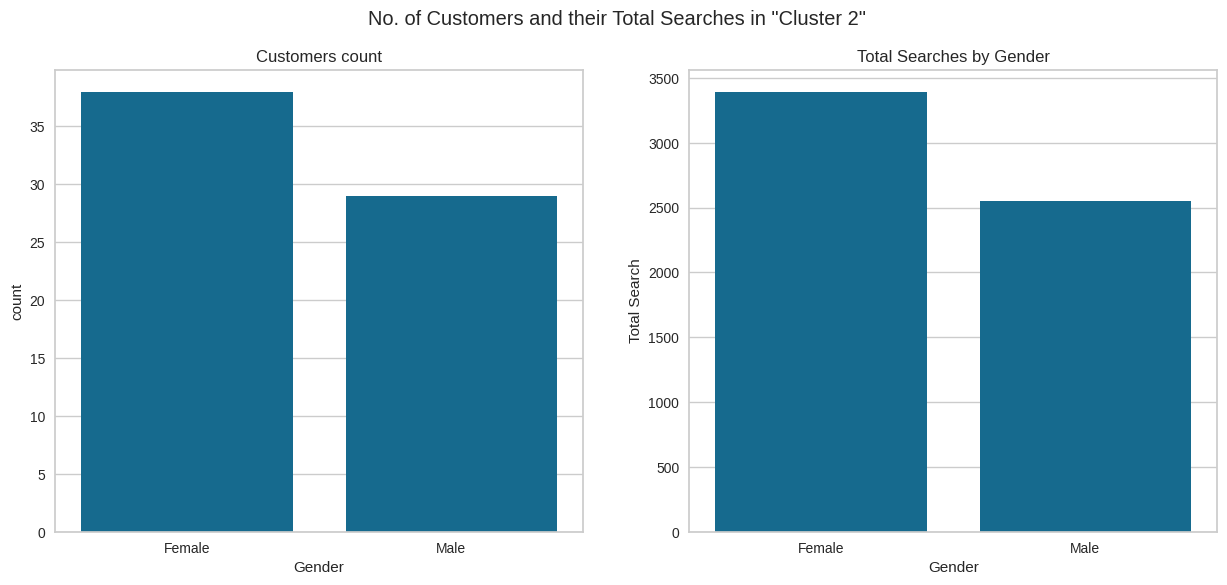

In [28]:
cl_2 = c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster == 2')
print(cl_2)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster == 2'),x='Gender')
plt.title('Customers count')

plt.subplot(1,2,2)
sns.barplot(data=cl_2,x='Gender',y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of Customers and their Total Searches in "Cluster 2"')
plt.show()

In [29]:
#@title Overall Analysis

In [30]:
final_df = c_df.groupby(['Cluster'],as_index=False).sum()
final_df


,Cluster,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Total Search
0,0,9446,MaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFe...,2675,5663,6622,12285
1,1,6104,FemaleFemaleFemaleFemaleMaleMaleFemaleMaleFema...,1516,3303,750,4092
2,2,4550,FemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFe...,3579,3146,2668,5948


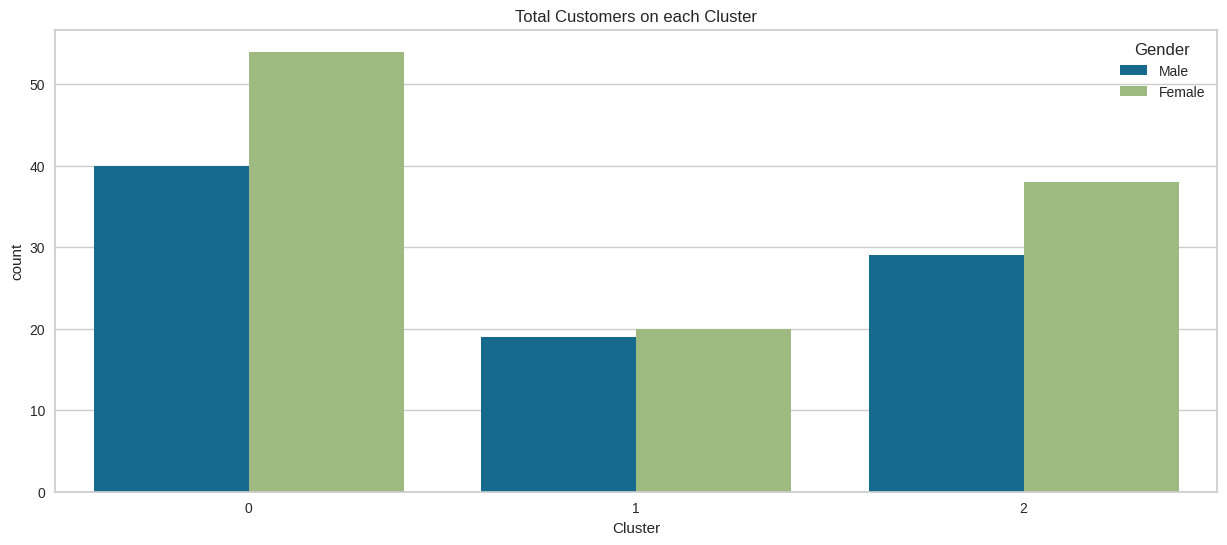

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(data=c_df,x='Cluster',hue='Gender')
plt.title('Total Customers on each Cluster')
plt.show()

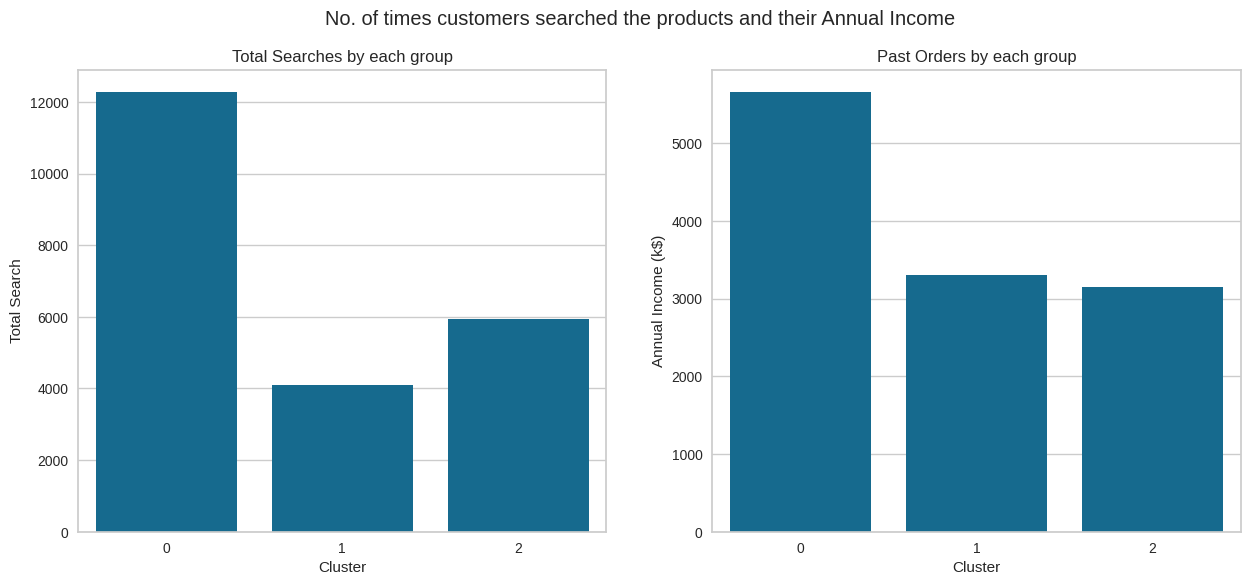

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=final_df,x='Cluster',y='Total Search')
plt.title('Total Searches by each group')

plt.subplot(1,2,2)
sns.barplot(data=final_df,x='Cluster',y='Annual Income (k$)')
plt.title('Past Orders by each group')
plt.suptitle('No. of times customers searched the products and their Annual Income')
plt.show()